![denoising](../../../../images/denoising_lg.png)
# 🪄 Basics of image denoising
---

In this notebook, we will introduce image denoising in Python using Scikit-image.

Tags: `Image denoising`, `Tutorial`

If you haven't already, we recommend you take a look at these tutorials before this one:

- [🐍 Setting up Python for scientific image analysis](../../../getting_started/pages/python_setup.md)
- [🚩 Basics of image data manipulation in Python](../../../getting_started/pages/image_manipulation.ipynb)

## Introduction

Image denoising is used to generate images with high visual quality, in which structures are easily distinguishable, and noisy pixels are removed. Denoised images are often more amendable to thresholding for segmentation.

To begin our image denoising demonstration, we will first import a few libraries:

- [Matplotlib](https://matplotlib.org/) to display images.
- [Numpy](https://numpy.org/) to manipulate numerical arrays.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

We will also need [scikit-image](https://scikit-image.org/), which will provides us with image processing filters, algorithms, and utility functions (e.g. for loading images).

Let's load the `coins` image from Scikit-image's `data` module to use it as an example.

In [3]:
from skimage.data import coins

image = coins() # An example image

print(f"Image shape (px): {image.shape}. Min value = {image.min()}, Max value = {image.max()}. Data type: {image.dtype}")

Image shape (px): (303, 384). Min value = 1, Max value = 252. Data type: uint8


Let's define a function that we can reuse to display images.

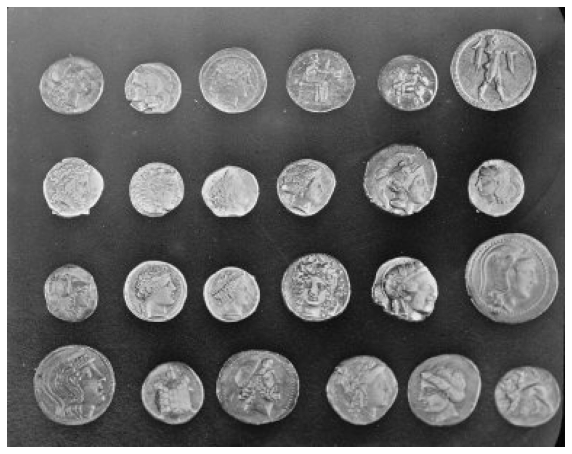

In [4]:
def display_image(image, title=''):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image, vmin=0, vmax=255, cmap=plt.cm.gray)
    ax.set_title(title)
    ax.axis('off')
    plt.show()

display_image(image)

````{note}
To read an image saved locally, you could use Scikit-image's `io` (input-output) module and provide a path to your image file. For example:

```
from skimage import io

image = io.imread('/path/to/my_image.tif')

display_image(image)
```

````

## Adding artificial noise to the image

For the sake of this tutorial, we will add some Gaussian noise to our image to simulate a noisy acquisition.

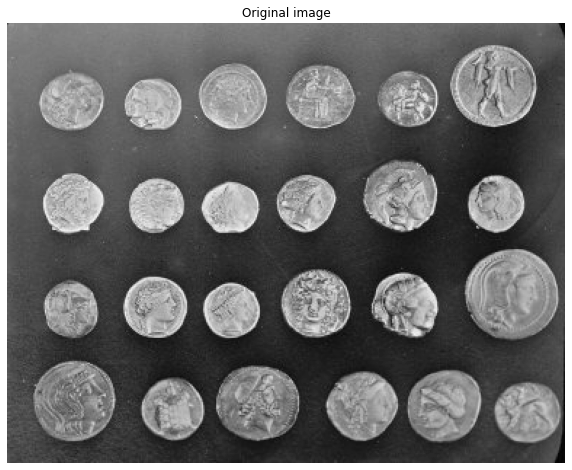

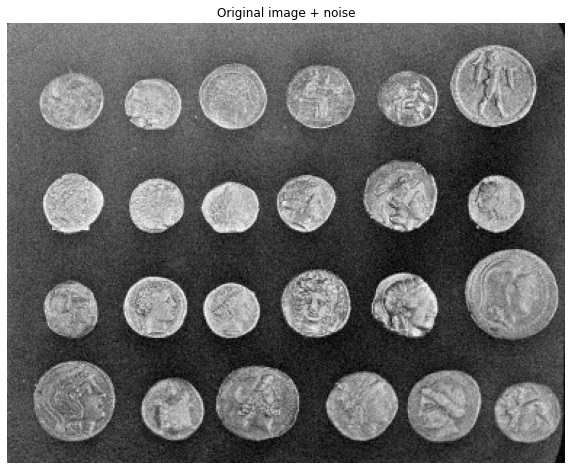

In [5]:
noise = np.random.normal(loc=0, scale=10, size=image.shape)
noisy_image = image + noise
noisy_image = np.clip(noisy_image, 0, 255)

display_image(image, 'Original image')
display_image(noisy_image, 'Original image + noise')

## Denoising techniques

Let's try denoising our image. To do this, we'll first test the application of a `gaussian` filter and a `median` filter to the noisy image.

In [6]:
from skimage.filters import gaussian, median

The `sigma` parameter of the Gaussian filter controls the degree of blurring in the image. There is a trade-off between the intensity of the blurring and the preservation of fine details in the image.

```{tip}
Try applying different values of `sigma` and observe how it affects the resulting image!
```

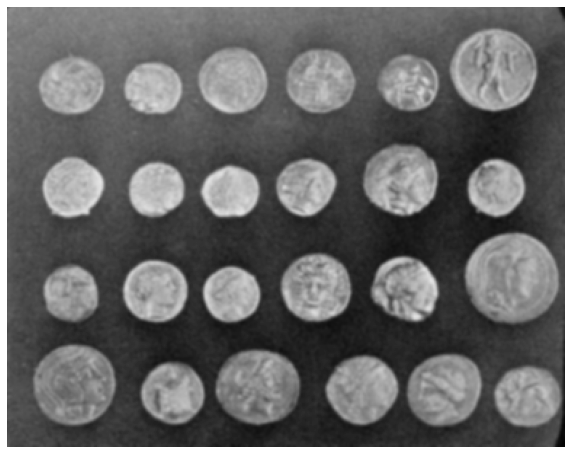

In [7]:
denoised_image_gaussian = gaussian(noisy_image, sigma=1)

display_image(denoised_image_gaussian)

Let's compare this method with the application of a `median` filter.

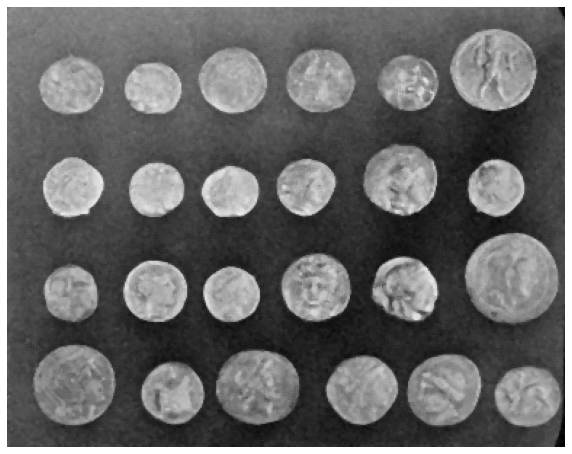

In [8]:
denoised_image_median = median(noisy_image)

display_image(denoised_image_median)

Finally, let's use **non-local means** denoising. In this case, we also estimate the standard deviation of the noise from the image.

In [9]:
from skimage.restoration import denoise_nl_means, estimate_sigma

In [10]:
sigma_est = estimate_sigma(noisy_image)

print(f"Estimated standard deviation of the noise: {sigma_est:.1f}")

Estimated standard deviation of the noise: 11.4


Our estimate is not too far from the value of `10` that we have used when simulating the noise!

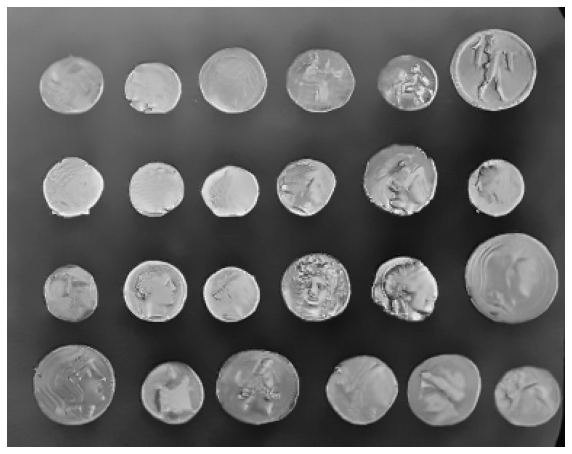

In [11]:
denoised_image_nl_means = denoise_nl_means(noisy_image, h=1.15*sigma_est, fast_mode=True, patch_size=5, patch_distance=6)

display_image(denoised_image_nl_means)

As usual, to learn more about the functions we use, it's a good idea to read their documentation.

In [12]:
help(denoise_nl_means)

Help on function denoise_nl_means in module skimage.restoration.non_local_means:

denoise_nl_means(image, patch_size=7, patch_distance=11, h=0.1, fast_mode=True, sigma=0.0, *, preserve_range=False, channel_axis=None)
    Perform non-local means denoising on 2D-4D grayscale or RGB images.
    
    Parameters
    ----------
    image : 2D or 3D ndarray
        Input image to be denoised, which can be 2D or 3D, and grayscale
        or RGB (for 2D images only, see ``channel_axis`` parameter). There can
        be any number of channels (does not strictly have to be RGB).
    patch_size : int, optional
        Size of patches used for denoising.
    patch_distance : int, optional
        Maximal distance in pixels where to search patches used for denoising.
    h : float, optional
        Cut-off distance (in gray levels). The higher h, the more permissive
        one is in accepting patches. A higher h results in a smoother image,
        at the expense of blurring features. For a Gaussia

## Conclusion

In this tutorial, we have looked at three simple methods for denoising an image:

- Applying a Gaussian filter
- Applying a Median filter
- Non-local means filtering


## Going further

There are many other powerful denoising techniques and algorithms, and much more to know. We recommend that you have a look at Scikit-image's excellent resources on the topic.

- [skimage.restoration](https://scikit-image.org/docs/stable/api/skimage.restoration.html)
- [Denoising a picture](https://scikit-image.org/docs/stable/auto_examples/filters/plot_denoise.html)
- [Comparing Different Classes of Denoisers](https://scikit-image.org/docs/stable/auto_examples/filters/plot_j_invariant_tutorial.html#comparing-different-classes-of-denoiser)
  
You can also have a look at our collections of learning resources, jupyter notebooks, and software tools related to `Image denoising` on our [topic page](./page.md).